In [6]:
from pathlib import Path
import pandas as pd
import numpy as np
import datetime, sys, sklearn

ROOT_DIR = Path(__file__).resolve().parents[1] if "__file__" in locals() else Path.cwd().parents[0]
DATA_DIR = ROOT_DIR / "data" / "processed"
REPORT_DIR = ROOT_DIR / "reports" / "modeling"
REPORT_DIR.mkdir(parents=True, exist_ok=True)

In [7]:
train = pd.read_csv(DATA_DIR / "train.csv")
val = pd.read_csv(DATA_DIR / "val.csv")
test = pd.read_csv(DATA_DIR / "test.csv")

print("✅ Loaded datasets:")
print(f"Train: {train.shape}, Val: {val.shape}, Test: {test.shape}")

✅ Loaded datasets:
Train: (4929, 29), Val: (1057, 29), Test: (1057, 29)


In [8]:
print("Columns identical across splits:", 
      train.columns.equals(val.columns) and train.columns.equals(test.columns))

print("\nMissing values per split:")
print("Train:", train.isnull().sum().sum())
print("Val:", val.isnull().sum().sum())
print("Test:", test.isnull().sum().sum())

print("\nTarget distribution:")
for name, df in zip(["Train", "Val", "Test"], [train, val, test]):
    churn_counts = df["Churn"].value_counts(normalize=True).round(3)
    print(f"{name}: {churn_counts.to_dict()}")

Columns identical across splits: True

Missing values per split:
Train: 0
Val: 0
Test: 0

Target distribution:
Train: {0: 0.735, 1: 0.265}
Val: {0: 0.734, 1: 0.266}
Test: {0: 0.735, 1: 0.265}


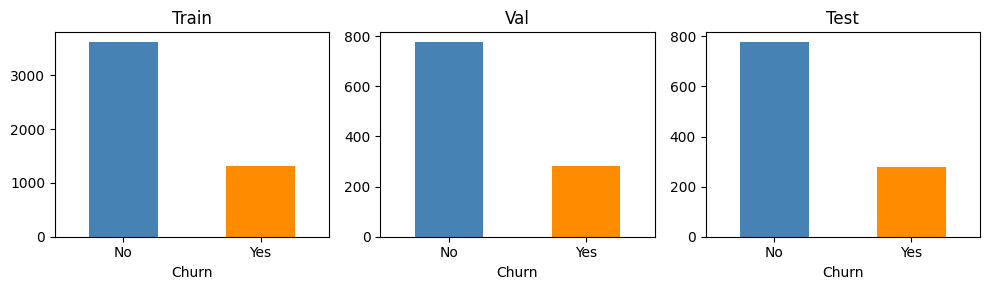

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for i, (name, df) in enumerate(zip(["Train", "Val", "Test"], [train, val, test])):
    df["Churn"].value_counts().plot(kind="bar", ax=ax[i], color=["steelblue", "darkorange"], title=name)
    ax[i].set_xticklabels(["No", "Yes"], rotation=0)
plt.tight_layout()
plt.show()

In [10]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

md = f"""# Model Input Overview

**Datum/Zeit:** {now}  
**random_state:** 42  

---

## Datasets

| Split | Samples | Features | Churn % |
|-------|----------|-----------|----------|
| Train | {len(train):,} | {train.shape[1]} | {train['Churn'].mean()*100:.1f}% |
| Val | {len(val):,} | {val.shape[1]} | {val['Churn'].mean()*100:.1f}% |
| Test | {len(test):,} | {test.shape[1]} | {test['Churn'].mean()*100:.1f}% |

---

## Checks

- Same columns across all splits: {train.columns.equals(val.columns) and train.columns.equals(test.columns)}
- Missing values (train/val/test): {train.isnull().sum().sum()}/{val.isnull().sum().sum()}/{test.isnull().sum().sum()}
- Balanced training set confirmed (SMOTE applied).

---

## Notes

- Features are fully numeric, scaled (0–1), and clean.
- Target variable: `Churn` (0 = No, 1 = Yes).
- These datasets serve as input for all subsequent modeling steps (Random Forest, XGBoost, GridSearchCV).
- All transformations follow reproducibility standards per **CRISP-ML(Q)** (Studer et al., 2021).

---

## References

- Boozary et al. (2025): *Enhancing customer retention with machine learning* – Defines modeling baseline and metrics.  
- Studer et al. (2021): *CRISP-ML(Q)* – Emphasizes reproducibility and data traceability.
"""

(Path(REPORT_DIR) / "model_input_overview.md").write_text(md, encoding="utf-8")

980